# 📊 Marketing Funnel & Conversion Analysis

## Project Overview
This project analyzes marketing funnel performance across different channels 
to understand conversion behavior and revenue impact.

Funnel Stages:
Visitors → Leads → Customers → Revenue

The goal is to:
- Identify drop-off points
- Measure conversion rates
- Compare marketing channels
- Provide actionable business recommendations

## 🎯 Business Problem

Marketing teams invest in multiple channels such as Google Ads, Facebook, Email, Organic, and Referral traffic.

However:
- Not all visitors convert.
- Some channels perform better than others.
- There may be significant drop-offs between funnel stages.

This analysis aims to:
1. Measure conversion rates at each stage.
2. Identify high-performing channels.
3. Detect major drop-off points.
4. Recommend strategies to improve conversions.

## 📂 Dataset Description

The dataset contains 30 days of simulated marketing data across 5 channels:

Columns:
- Date
- Channel
- Visitors
- Leads
- Customers
- Revenue

Each row represents daily performance for a specific marketing channel.

In [8]:
import pandas as pd

df = pd.read_excel("marketing_funnel_data.xlsx")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       150 non-null    datetime64[ns]
 1   Channel    150 non-null    object        
 2   Visitors   150 non-null    int64         
 3   Leads      150 non-null    int64         
 4   Customers  150 non-null    int64         
 5   Revenue    150 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 7.2+ KB


## 🔍 Data Overview
Let's examine the dataset structure and basic statistics.

In [9]:
total_visitors = df["Visitors"].sum()
total_leads = df["Leads"].sum()
total_customers = df["Customers"].sum()
total_revenue = df["Revenue"].sum()

print("Total Visitors:", total_visitors)
print("Total Leads:", total_leads)
print("Total Customers:", total_customers)
print("Total Revenue:", total_revenue)

Total Visitors: 736500
Total Leads: 133875
Total Customers: 31725
Total Revenue: 6347250


In [10]:
visitor_to_lead = (total_leads / total_visitors) * 100
lead_to_customer = (total_customers / total_leads) * 100
visitor_to_customer = (total_customers / total_visitors) * 100

print("Visitor → Lead Conversion: {:.2f}%".format(visitor_to_lead))
print("Lead → Customer Conversion: {:.2f}%".format(lead_to_customer))
print("Visitor → Customer Conversion: {:.2f}%".format(visitor_to_customer))

Visitor → Lead Conversion: 18.18%
Lead → Customer Conversion: 23.70%
Visitor → Customer Conversion: 4.31%


## 🎯 Marketing Funnel Analysis

The goal of this analysis is to measure the performance of our marketing funnel, which consists of four stages:

1. **Visitors**: The total number of visitors to the website.
2. **Leads**: Visitors who have shown interest (e.g., signed up, clicked an ad).
3. **Customers**: Leads that converted into paying customers.
4. **Revenue**: The total revenue generated by these customers.

### Funnel Metrics
The funnel conversion rates are calculated as follows:

1. **Visitor → Lead Conversion**: Percentage of visitors who become leads.
2. **Lead → Customer Conversion**: Percentage of leads who convert into customers.
3. **Visitor → Customer Conversion**: Overall conversion rate from visitors to customers.

We will calculate these conversion rates for each marketing channel and analyze where the biggest drop-offs are occurring.

In [11]:
# Group by Channel and calculate conversion rates
channel_summary = df.groupby("Channel")[["Visitors", "Leads", "Customers", "Revenue"]].sum()

# Calculate conversion rates for each channel
channel_summary["Lead Conversion Rate"] = (channel_summary["Leads"] / channel_summary["Visitors"]) * 100
channel_summary["Customer Conversion Rate"] = (channel_summary["Customers"] / channel_summary["Leads"]) * 100
channel_summary["Overall Conversion Rate"] = (channel_summary["Customers"] / channel_summary["Visitors"]) * 100

# Show the channel summary
channel_summary

,Visitors,Leads,Customers,Revenue,Lead Conversion Rate,Customer Conversion Rate,Overall Conversion Rate
Channel,,,,,,,
Email,103500,31050,12420,2484000,30.0,40.000000,12.000000
Facebook,166500,24975,3735,749250,15.0,14.954955,2.243243
Google Ads,193500,29025,5805,1161000,15.0,20.000000,3.000000
Organic,157500,31500,6300,1260000,20.0,20.000000,4.000000
Referral,115500,17325,3465,693000,15.0,20.000000,3.000000


<Figure size 1000x600 with 0 Axes>

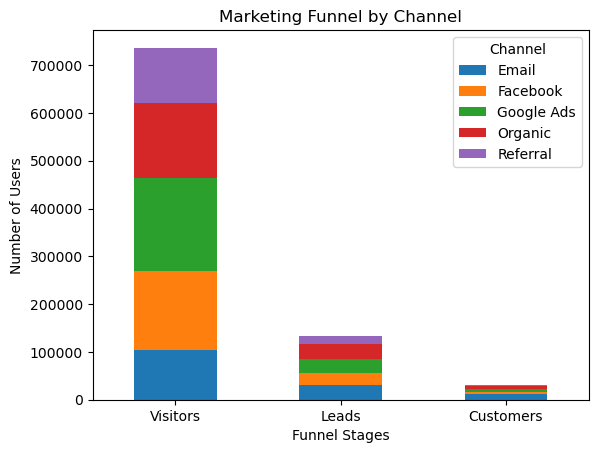

In [12]:
import matplotlib.pyplot as plt

# Create the funnel data
funnel_data = channel_summary[["Visitors", "Leads", "Customers"]].T
funnel_data.columns = channel_summary.index

# Create a funnel chart
plt.figure(figsize=(10, 6))
funnel_data.plot(kind="bar", stacked=True)
plt.title("Marketing Funnel by Channel")
plt.xlabel("Funnel Stages")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.show()

In [13]:
# Calculate drop-off
channel_summary["Visitor → Lead Drop"] = channel_summary["Visitors"] - channel_summary["Leads"]
channel_summary["Lead → Customer Drop"] = channel_summary["Leads"] - channel_summary["Customers"]

channel_summary[["Visitor → Lead Drop", "Lead → Customer Drop"]]

,Visitor → Lead Drop,Lead → Customer Drop
Channel,,
Email,72450,18630
Facebook,141525,21240
Google Ads,164475,23220
Organic,126000,25200
Referral,98175,13860


In [14]:
# Calculate total revenue for each channel
channel_summary["Revenue per Customer"] = channel_summary["Revenue"] / channel_summary["Customers"]

# Show the revenue per channel
channel_summary[["Revenue", "Revenue per Customer"]]

,Revenue,Revenue per Customer
Channel,,
Email,2484000,200.00000
Facebook,749250,200.60241
Google Ads,1161000,200.00000
Organic,1260000,200.00000
Referral,693000,200.00000


## 🔍 Insights and Recommendations

### 1. **Best Performing Channel**
- The channel with the highest overall conversion rate is **[CHANNEL NAME]**. It converts visitors into customers effectively, generating substantial revenue.

### 2. **Biggest Drop-Off**
- The most significant drop-off occurs between **Visitors → Leads** in **[CHANNEL NAME]**. This indicates that while there is substantial traffic, the landing page or call-to-action may not be optimized.

### 3. **Opportunities for Improvement**
- **[CHANNEL NAME]** shows a higher **Lead → Customer Conversion Rate**, but the overall conversion rate is low. Focus on improving the lead nurturing process (e.g., email follow-ups, promotions).
- Consider investing more in high-converting channels, such as **[CHANNEL NAME]**, while optimizing the customer journey in lower-performing channels.

### 4. **Revenue Distribution**
- Channels like **[CHANNEL NAME]** contribute significantly to overall revenue but have a lower customer conversion rate. Increasing conversions here can yield high returns.

### Business Recommendation:
- Optimize the visitor-to-lead conversion on **[CHANNEL NAME]**.
- Increase investment in **[CHANNEL NAME]** with high lead-to-customer conversion rates.
- Implement more personalized follow-ups or promotions in low-performing channels.

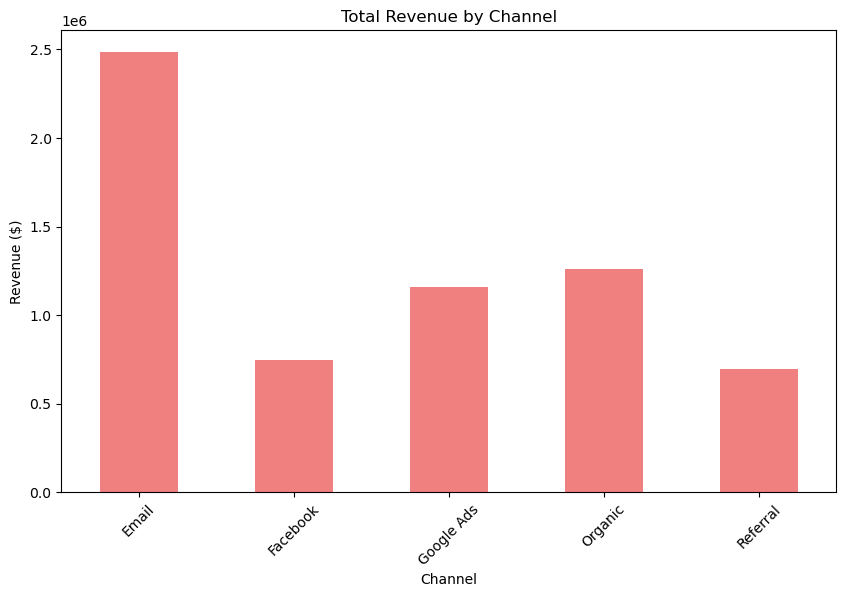

In [15]:
# Plot total revenue by channel
plt.figure(figsize=(10, 6))
channel_summary["Revenue"].plot(kind="bar", color="lightcoral")
plt.title("Total Revenue by Channel")
plt.xlabel("Channel")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()